# 标准线列阵

考虑一个$16$元标准线列阵沿$z$轴布放，顺着$z$轴正方向从$1$到$16$对传感器依次编号。令$0<\theta<180^\circ$表示俯仰角。

- 此次作业使用`python` 和 `jupyterlab`完成；
- 初始噪声方差为 `1` 时，不太合适作为题目的初始条件，故改为 `0.0001`；
- 考虑信号和噪声均为复数，但采用实部替代，信号功率为`1`，噪声功率先后取为`0.0001`和 `10`。

In [1]:
# 标准库
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 150 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率

In [2]:
# 添加本地函数库路径
import sys
sys.path.append('..')

# 本地函数库
import antarray

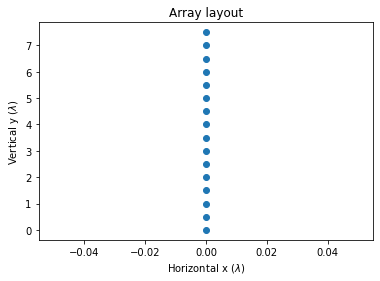

In [3]:
# 构建阵列，输出阵列的外观图，半波长处理
lin_array = antarray.LinearArray(16, 0.5)
plt.figure()
plt.scatter(lin_array.y, lin_array.x)
plt.xlabel(r'Horizontal x ($\lambda$)')
plt.ylabel(r'Vertical y ($\lambda$)')
plt.title('Array layout')
plt.show()

## (1)	阵列加权方式为均匀加权时，画出波束图$\mathcal{B}(\theta)$，用$\mathrm{dB}$表示，并给出半功率波束宽度。

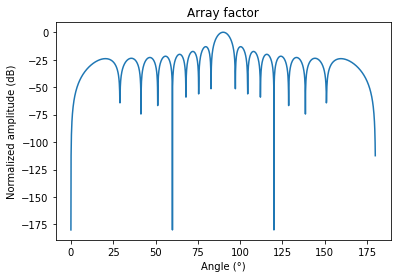

In [4]:
# 均匀加权波束图
theta = np.arange(-90, 90, 0.1)
pattern = lin_array.get_pattern(theta, beam_loc=0, window='Square')

fig1 = plt.figure(1)
plt.plot(theta + 90, 20*np.log10(np.abs(pattern['array_factor'])+ 1e-9))
plt.xlabel('Angle (°)')
plt.ylabel('Normalized amplitude (dB)')
plt.title('Array factor')
plt.show()

In [5]:
# 半功率波束宽度 HPBW
thetahpbw = theta[np.abs(pattern['array_factor'])>=0.707] 
H_theta = thetahpbw[-1] - thetahpbw[0]
print(f'HPBW : %d°' % H_theta)

HPBW : 6°


## (2)	设扫描角$\theta_T$为$30°$，重做(1)，并比较。

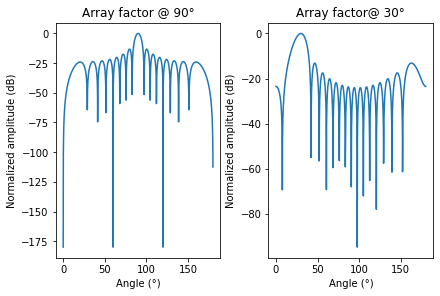

In [6]:
# 扫描角为30°时的波束图
theta = np.arange(-90, 90, 0.1)
pattern1 = lin_array.get_pattern(theta, beam_loc=-60, window='Square')
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].plot(theta + 90, 20*np.log10(np.abs(pattern['array_factor']) + 1e-9))
ax[0].set_xlabel('Angle (°)')
ax[0].set_ylabel('Normalized amplitude (dB)')
ax[0].set_title('Array factor @ 90°')

ax[1].plot(theta + 90, 20*np.log10(np.abs(pattern1['array_factor']) + 1e-9))
ax[1].set_xlabel('Angle (°)')
ax[1].set_ylabel('Normalized amplitude (dB)')
ax[1].set_title('Array factor@ 30°')
plt.show()

In [7]:
# 半功率波束宽度 HPBW
thetahpbw = theta[np.abs(pattern1['array_factor']) > 0.707] 
H_theta = thetahpbw[-1] - thetahpbw[0]
print(f'HPBW : %d°' % H_theta)

HPBW : 12°


## (3)	把阵列加权方式改为DC加权，重做(1)，并比较。

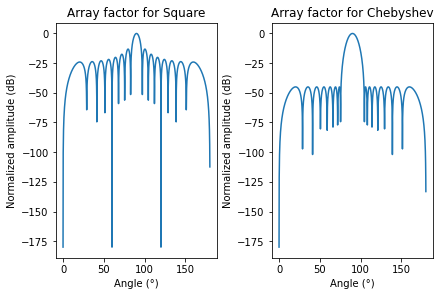

In [8]:
pattern2 = lin_array.get_pattern(theta, beam_loc=0, window='Chebyshev', sll=-45)

fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].plot(theta + 90, 20*np.log10(np.abs(pattern['array_factor']) + 1e-9))
ax[0].set_xlabel('Angle (°)')
ax[0].set_ylabel('Normalized amplitude (dB)')
ax[0].set_title('Array factor for Square')

ax[1].plot(theta + 90, 20*np.log10(np.abs(pattern2['array_factor']) + 1e-9))
ax[1].set_xlabel('Angle (°)')
ax[1].set_ylabel('Normalized amplitude (dB)')
ax[1].set_title('Array factor for Chebyshev')
plt.show()

In [9]:
# 半功率波束宽度 HPBW
thetahpbw = theta[np.abs(pattern2['array_factor']) > 0.707] 
H_theta = thetahpbw[-1] - thetahpbw[0]
print(f'HPBW : %d°' % H_theta)

HPBW : 9°


## (4)	把阵元间距减为波长的$1/3$时，重做(1)，并比较。

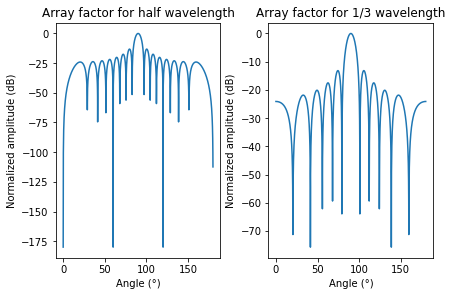

In [10]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].plot(theta + 90, 20*np.log10(np.abs(pattern['array_factor']) + 1e-9))
ax[0].set_xlabel('Angle (°)')
ax[0].set_ylabel('Normalized amplitude (dB)')
ax[0].set_title('Array factor for half wavelength')
lin_array.update_parameters(size=16, spacing=1/3)
pattern3 = lin_array.get_pattern(theta, beam_loc=0, window='Square')
ax[1].plot(theta + 90, 20*np.log10(np.abs(pattern3['array_factor']) + 1e-9))
ax[1].set_xlabel('Angle (°)')
ax[1].set_ylabel('Normalized amplitude (dB)')
ax[1].set_title('Array factor for 1/3 wavelength')
plt.show()
lin_array.update_parameters(size=16, spacing=1/2)

## (5)	假设一个脉冲信号以平面波的形式从$60°$方向入射到阵列。

脉冲持续时间为$0.4\mathrm{s}$，中心频率为$62.5\mathrm{Hz}$，幅度为$1$。阵列系统以$1\mathrm{kHz}$频率对信号进行采样，一共采集了$2\mathrm{s}$长的数据。假设1号阵元收到脉冲的时刻为$1\mathrm{s}$。设噪声是方差为$1$的高斯白噪声。在同一幅图中画出所有$16$个传感器接收信号的波形。假设阵列以$10°$为间隔从$30°$到$90°$对空间进行扫描，分别画出对应的波束形成器输出脉冲（6幅图的纵坐标应采用统一的取值范围以便比较）。

Generator return value: done


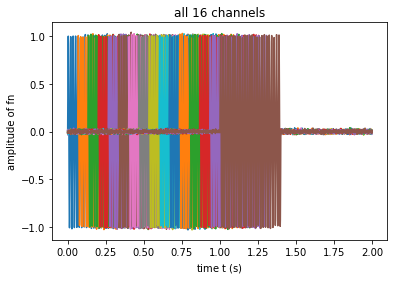

In [11]:
# 16个阵元收到的波形，为了得到有效结论，初始方差用0.0001 代替。
fs = 1000
sigma2_n = 0.0001
rng = np.random.default_rng()
t = np.arange(fs*0.4)
f = np.sin(2*np.pi*62.5/fs*t)
f16 = np.pad(f, (0, fs*2 - len(t)))
def fn(f, channels):  
    n = 0
    max = channels - 1
    while n <= max:
        fn = np.pad(f, (0+int(fs*1/max*n), fs*2 - len(t) - int(fs*1/max*n))) 
        fn += np.sqrt(sigma2_n)* rng.standard_normal(fs*2)
        yield fn
        n = n + 1
    return 'done'

def plot_channels():
    g = fn(f, 16)
    while True:
        try:
            f_n = next(g)
            plt.plot(np.arange(fs*2)/fs, f_n)
        except StopIteration as e:
            print('Generator return value:', e.value)
            plt.xlabel(r'time t ($\mathrm{s}$)')
            plt.ylabel(r'amplitude of fn')
            plt.title('all 16 channels')
            plt.show()
            break
plot_channels()

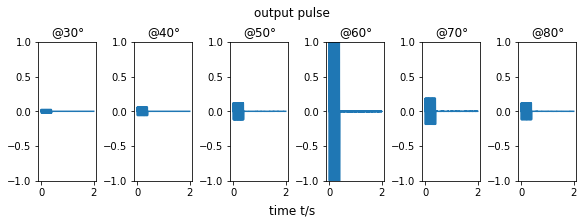

In [12]:
# 从30°到90°对空间进行扫描。
def plot_scan_step():
    l = 0
    fig, ax = plt.subplots(1,6, constrained_layout=True, figsize=(8, 3))
    while l < 6 :
        pattern = lin_array.get_pattern(theta, beam_loc= -60 + l*10, window='Square')
        B = abs(pattern['array_factor'][round(len(theta)/3)])
        f_out = B * (f16 + np.mean(np.sqrt(sigma2_n)* rng.standard_normal((fs*2, 16)) ,1))
        ax[l].plot(np.arange(fs*2)/fs, f_out, ms=4)
        ax[l].set_ylim([max(1, 1*np.sqrt(sigma2_n))* a for a in [-1, 1]])
        ax[l].set_title('@'+ str(-60+90 + l*10)+'°')
        l = l + 1
    fig.supxlabel('time t/s')
    fig.suptitle('output pulse')
plot_scan_step()

## (6)	阵列以$1°$为间隔从垂直方向$0°$到$180°$对空间进行扫描。

画出波束形成器输出脉冲平均功率随扫描角增大的变化曲线（绘制在同一幅图中）。有一个峰值，类似于Fourier扫描出一个单频信号。

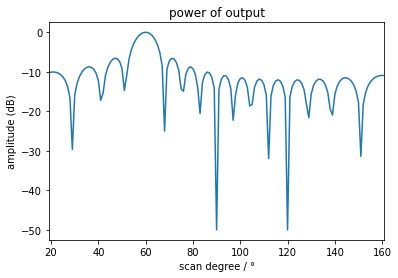

In [13]:
# 输出脉冲平均功率随扫描角增大的变化曲线
def plot_power():
    l = 0
    power_out = []
    while l < 180 :
        pattern = lin_array.get_pattern(theta, beam_loc= -90 + l*1, window='Square')
        B = abs(pattern['array_factor'][round(len(theta)/3)])
        p_noise = np.var(np.sqrt(sigma2_n)* rng.standard_normal((fs*2, 16)) @ np.abs(pattern['weight']))
        power_out.append(B *(1 + p_noise))
        # power_out.append(B *(1 + sigma2_n/16))
        l = l + 1
    plt.plot(10*np.log10(np.asarray(power_out) +  1e-5))
    plt.xlim(np.arccos(1-0.446*2/16)*180/np.pi, np.arccos(-1+0.446*2/16)*180/np.pi)
    plt.title('power of output')
    plt.xlabel('scan degree / °')
    plt.ylabel('amplitude (dB)')
    
plt.figure()
plot_power()
plt.show()

## (7)	把噪声的方差增加到10，重做(5)、(6)，并比较。

Generator return value: done


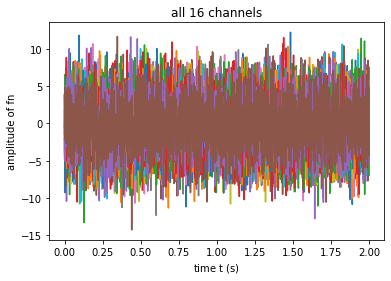

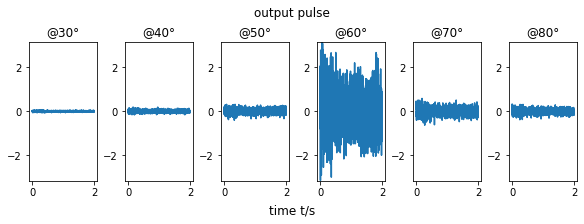

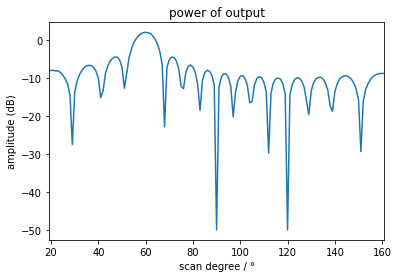

In [14]:
sigma2_n = 10
plot_channels()
plot_scan_step()
plt.figure()
plot_power()
sigma2_n = 0.0001

同为 `Square` 加权，方差不一致时：

- 扫描角度为60°，输出波形的幅值取得最大值。
- 平均输出功率的波形保持不变，随噪声方差的增加，平均功率波形向上偏移。

## (8)	把加权方式改为DC加权，重做(5)、(6)，并比较。

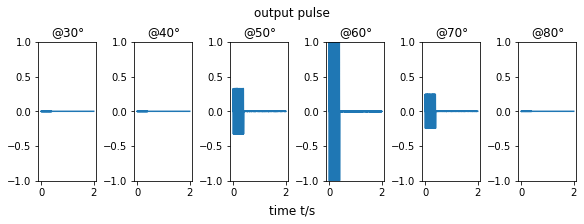

In [15]:
# 从30°到90°对空间进行扫描。
def plot_scan_step():
    l = 0
    fig, ax = plt.subplots(1,6, constrained_layout=True, figsize=(8, 3))
    while l < 6 :
        pattern = lin_array.get_pattern(theta, beam_loc= -60 + l*10, window='Chebyshev', sll=-45)
        B = abs(pattern['array_factor'][round(len(theta)/3)])
        f_out = B * (f16 + np.sqrt(sigma2_n)* rng.standard_normal((fs*2, 16)) @ np.abs(pattern['weight']))
        ax[l].plot(np.arange(fs*2)/fs, f_out, ms=4)
        ax[l].set_ylim([max(1, 1*np.sqrt(sigma2_n))* a for a in [-1, 1]])
        ax[l].set_title('@'+ str(-60+90 + l*10)+'°')
        l = l + 1
    fig.supxlabel('time t/s')
    fig.suptitle('output pulse')
plot_scan_step()

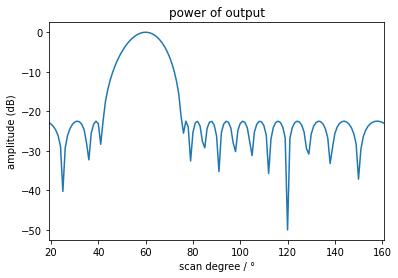

In [16]:
# 输出脉冲平均功率随扫描角增大的变化曲线
def plot_power():
    l = 0
    power_out = []
    b = []
    while l < 180 :
        pattern = lin_array.get_pattern(theta, beam_loc= -90 + l*1, window='Chebyshev', sll=-45)
        B = abs(pattern['array_factor'][round(len(theta)/3)])
        b.append(B)
        p_noise = np.var(np.sqrt(sigma2_n)* rng.standard_normal((fs*2, 16)) @ np.abs(pattern['weight']))
        power_out.append(B *(1 + p_noise))
        l = l + 1
    plt.figure()
    plt.plot(10*np.log10(np.asarray(power_out) +  1e-5))
    plt.xlim(np.arccos(1-0.446*2/16)*180/np.pi, np.arccos(-1+0.446*2/16)*180/np.pi)
    plt.title('power of output')
    plt.xlabel('scan degree / °')
    plt.ylabel('amplitude (dB)')
plot_power()

方差同为 `0.0001`时， `Square` 加权与 `Chebyshev` 加权对比时：

- 扫描角度为60°，输出波形的幅值取得最大值。
- 平均输出功率的波形差异较大，主瓣变宽，关于来波方向的信噪比 增大。

## (9)	仍采用DC加权，但把噪声方差增加到10，重做(5)、(6)，并与(7)比较。

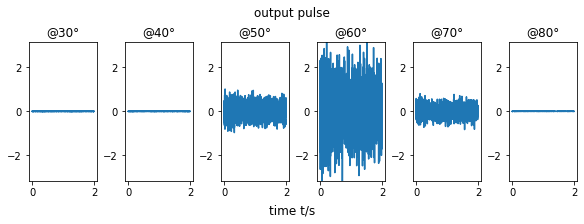

In [17]:
# 从30°到90°对空间进行扫描。

sigma2_n = 10
plot_scan_step()

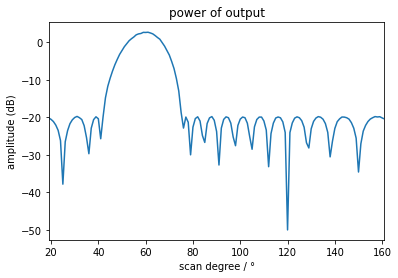

In [18]:
# 输出脉冲平均功率随扫描角增大的变化曲线
plot_power()
sigma2_n = 0.0001

方差同为 `10`， `Square` 加权与 `Chebyshev` 加权对比时：

- 扫描角度为60°，输出波形的幅值取得最大值。
- 平均输出功率的波形保持不变，随噪声方差的增加，平均功率波形向上偏移。